<a href="https://colab.research.google.com/github/SOUNDHIRI/soundhiri-projects/blob/main/Ad_predict_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/advertising(1).csv")
# dataset import

In [ ]:
dataset.info()
# imformation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Daily Internet Usage'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Clicked on Ad'}>]], dtype=object)

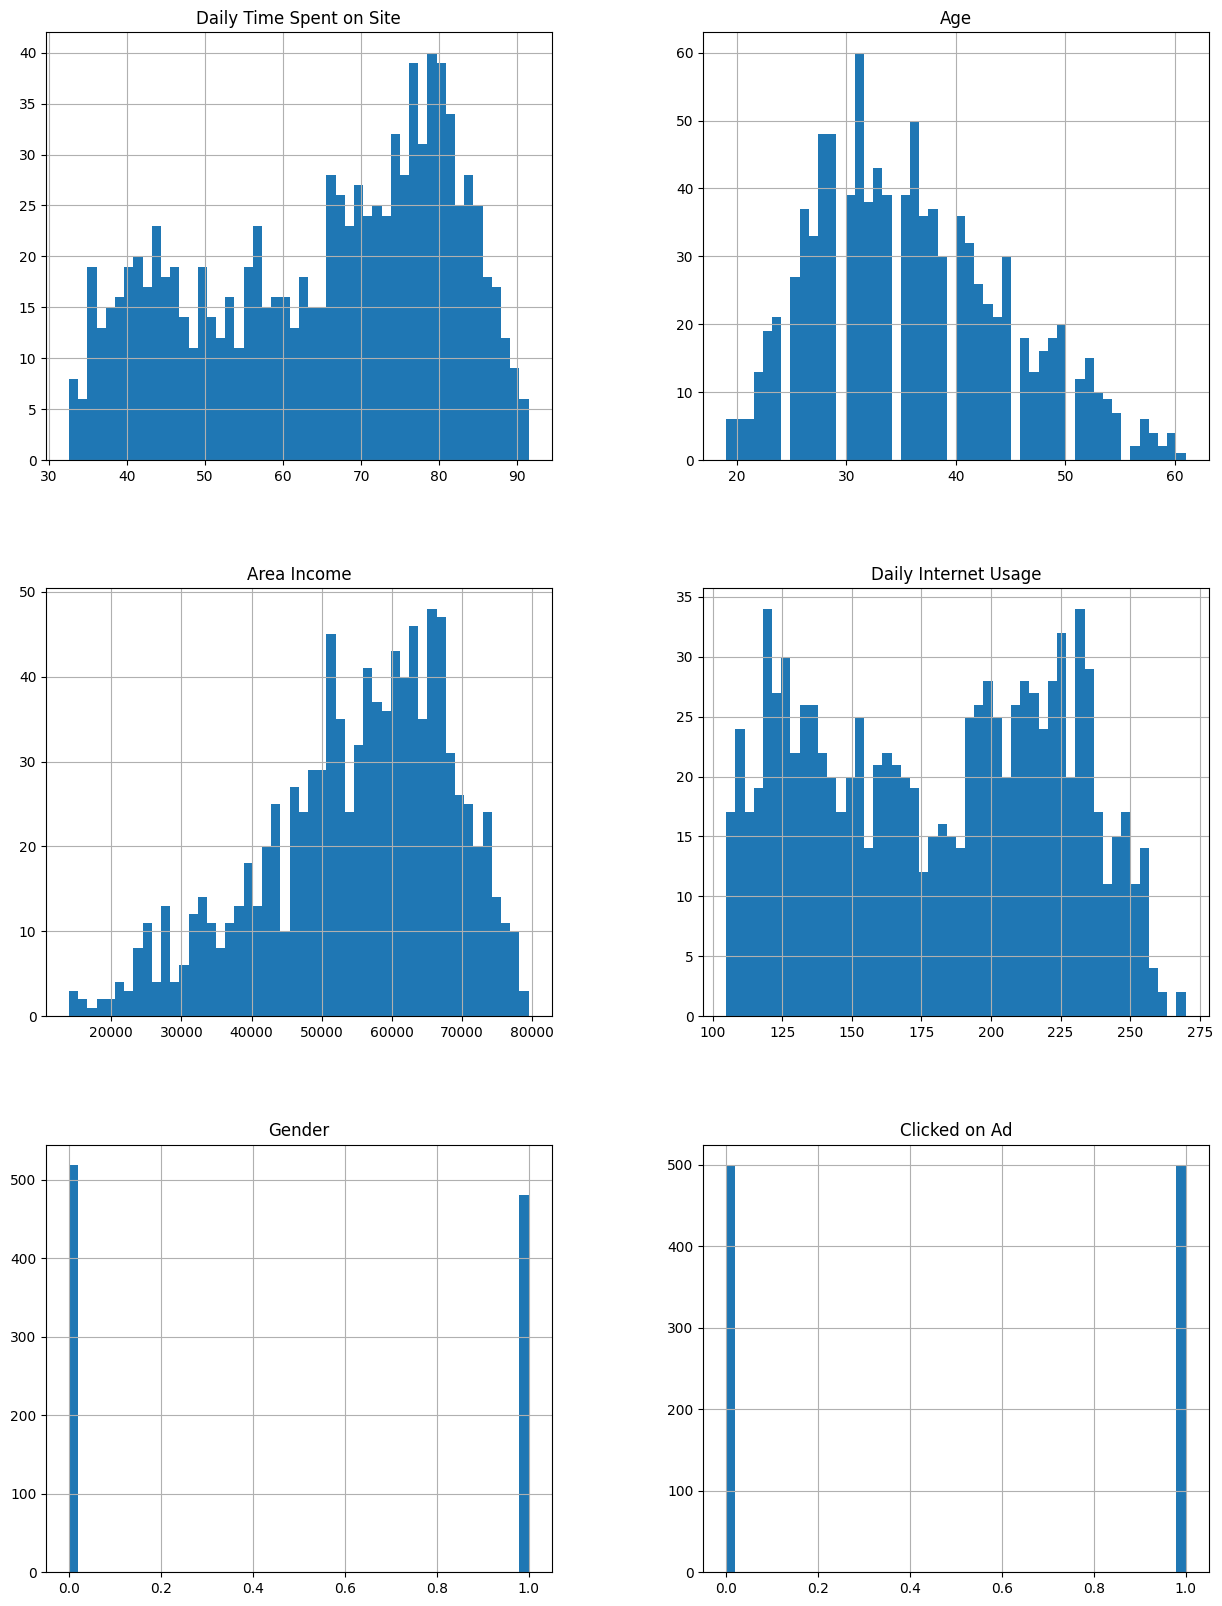

In [ ]:
dataset.hist(bins=50,figsize=(15,20))
# creates histograms for all the independent features in the dataset

In [ ]:


X = dataset.drop(columns=['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'])
# certain column in the dataset are removed since they are irrelevant for training the model

y=dataset['Clicked on Ad']
# y is the actual value , it is the value that the model will predict based on the given inputs x


X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)
# here the data is split to training data (80%) and testing data (20%)


#pRe processing

# standard scaler is used to standardized the values , so that each feature has a similar scale
scaler = StandardScaler()

# the fit_transform() funtion isused to compute the parameters needed for transformation and then apply the transformation to the data. It combines two steps that is fitting the transformation to the training data and then transforming both the training and test data
X_train_scaled = scaler.fit_transform(X_train)

# but we only perform transform() to  the testing data since it applies previously learned transformation to new data .
X_test_scaled = scaler.transform(X_test)



input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape((-1, input_shape[0], input_shape[1]))
X_test_reshaped = X_test_scaled.reshape((-1, input_shape[0], input_shape[1]))
# reshapes the scaled input data to make it suitable with the expected input shape of the LSTM layers


In [ ]:
#lstm creation

# tf.keras.Sequential is used to create a linear stack of layers for a neural network. The layers are added one after the other, and the data flows sequentially through them , a sequential neural network is the msot commonly used type in Ann CNN and Rnn

# the lstm model
"""
The LSTM : Long Short-Term memo
ry layer in a neural network  are responsible for processing sequential data by maintaining and updating internal states over time .
LSTM layers are like smart cells in a neural network that are really good at understanding sequences of data like steps in a time series. so it is used for predicting the outcome for a combination of numerical data (the input)
"""
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# the RNN model used here is a sequential combination of a lstm layer with 64 neurons + a  dropout layer to prevent overfitting and another lstm layer with 32 neuorns
# the output layer uses a sigmid function as the activation function since it converts the probability to 0 and 1 , ie if <50% 0 and >50 is  1
# relu is an activation function relu - rectified linear unit  , it decides whether a neuron should be on  or  off  based on its input. we use many neurons in a hidden layer , and hence there will be many combination of neuorns nad certain combinations may be useless. hence a relu activation function
#  is used on the lstm lyer


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)


y_pred = model.predict(X_test_reshaped)
y_pred = np.round(y_pred)

print(y_pred)


Epoch 1/10
10/10 [==============================] - 10s 369ms/step - loss: 0.6927 - accuracy: 0.6094 - val_loss: 0.6843 - val_accuracy: 0.8313
Epoch 2/10
10/10 [==============================] - 0s 44ms/step - loss: 0.6797 - accuracy: 0.7812 - val_loss: 0.6675 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 0s 24ms/step - loss: 0.6595 - accuracy: 0.7891 - val_loss: 0.6364 - val_accuracy: 0.8125
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 0.6217 - accuracy: 0.7781 - val_loss: 0.5618 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 0s 33ms/step - loss: 0.5418 - accuracy: 0.7750 - val_loss: 0.4554 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 39ms/step - loss: 0.4701 - accuracy: 0.8328 - val_loss: 0.4023 - val_accuracy: 0.8250
Epoch 7/10
10/10 [==============================] - 0s 29ms/step - loss: 0.4407 - accuracy: 0.8188 - val_loss: 0.3891 - val_accuracy: 0.8313
Epoch 8/10


In [ ]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [ ]:
#ACcuracy
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss:.4f}")
print(f" Test accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 5ms/step - loss: 0.3861 - accuracy: 0.8150
Test loss: 0.3861
 Test accuracy: 0.8150


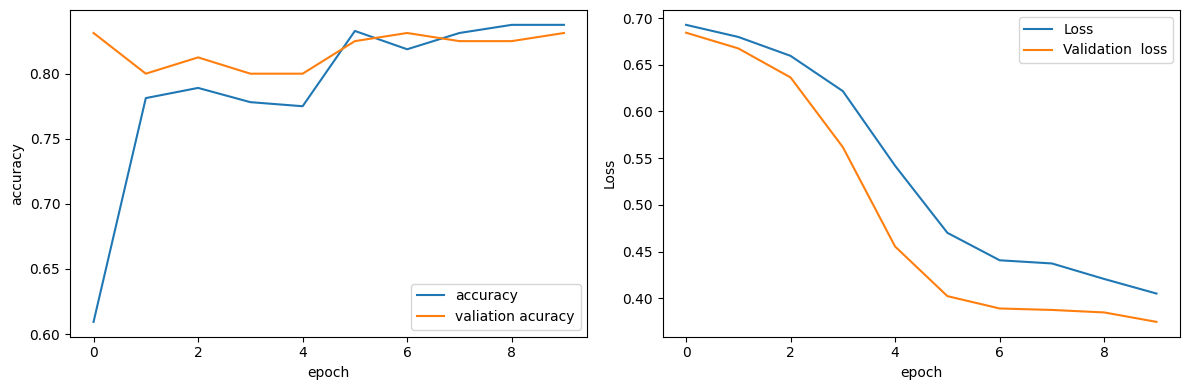

7/7 [==============================] - 0s 4ms/step


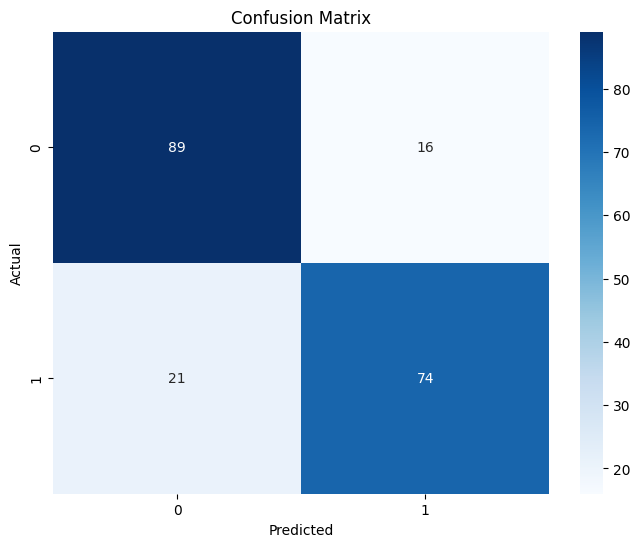

In [ ]:
# plots

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='valiation acuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation  loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

y_pred = model.predict(X_test_reshaped)
y_pred_class = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()